In [1]:
import pandas as pd, numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
import transformers as tm
# import spacy
# import tokenizers as tok
# from 
# import seaborn as sns

In [187]:
from tokenizers import Tokenizer
from tokenizers.decoders import ByteLevel as ByteLevelDecoder
from tokenizers.models import BPE
from tokenizers.normalizers import Lowercase, NFKC, Sequence
from tokenizers.pre_tokenizers import ByteLevel

In [3]:
pd.options.display.max_rows = 100

In [4]:
MAX_LEN = 150
# tokenizer = tm.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [5]:
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}
train = pd.read_csv('train.csv').fillna('')
test = pd.read_csv('test.csv')

In [ ]:
a = train.text[0]
# tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
print(a)
print(Tokenizer.encode(a))
Tokenizer.convert_tokens_to_ids(a)

In [10]:
tokenizer.convert_tokens_to_ids('SEP')

100

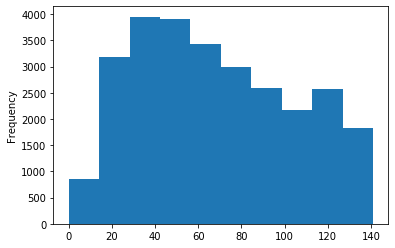

In [25]:
train.text.map(len).plot(kind = 'hist')

In [26]:
ct = train.shape[0]
input_ids = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask = np.zeros((ct,MAX_LEN),dtype='int32')
token_type_ids = np.zeros((ct,MAX_LEN),dtype='int32')
start_tokens = np.zeros((ct,MAX_LEN),dtype='int32')
end_tokens = np.zeros((ct,MAX_LEN),dtype='int32')

for k in range(train.shape[0]):
    
    # FIND OVERLAP
    text1 = " "+" ".join(train.loc[k,'text'].split())
    text2 = " ".join(train.loc[k,'selected_text'].split())
    idx = text1.find(text2)
    chars = np.zeros((len(text1)))
    chars[idx:idx+len(text2)]=1
    if text1[idx-1]==' ': chars[idx-1] = 1 
    enc = tokenizer.encode(text1) 
        
    # ID_OFFSETS
    offsets = []
    idx=0
    for t in enc:
        w = tokenizer.decode([t])
        offsets.append((idx,idx+len(w)))
        idx += len(w)
    
    # START END TOKENS
    toks = []
    for i,(a,b) in enumerate(offsets):
        sm = np.sum(chars[a:b])
        if sm>0: toks.append(i) 
        
    s_tok = sentiment_id[train.loc[k,'sentiment']]
    input_ids[k,:len(enc)+5] = [0] + enc + [2,2] + [s_tok] + [2]
    attention_mask[k,:len(enc)+5] = 1
    if len(toks)>0:
        start_tokens[k,toks[0]+1] = 1
        end_tokens[k,toks[-1]+1] = 1

In [22]:
# ct = test.shape[0]
# input_ids_t = np.ones((ct,MAX_LEN),dtype='int32')
# attention_mask_t = np.zeros((ct,MAX_LEN),dtype='int32')
# token_type_ids_t = np.zeros((ct,MAX_LEN),dtype='int32')

# for k in range(test.shape[0]):
        
#     # INPUT_IDS
#     text1 = " "+" ".join(test.loc[k,'text'].split())
#     enc = tokenizer.encode(text1)                
#     s_tok = sentiment_id[test.loc[k,'sentiment']]
#     input_ids_t[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
#     attention_mask_t[k,:len(enc.ids)+5] = 1

In [11]:
# Load dataset, tokenizer, model from pretrained model/vocabulary
tokenizer = tm.BertTokenizer.from_pretrained('bert-base-cased')
model = tm.TFBertModel.from_pretrained('bert-base-cased')
# data = tensorflow_datasets.load('glue/mrpc')

In [34]:
a = np.array([tokenizer.encode(train.text[0])])
model(a)


(<tf.Tensor: shape=(1, 12, 768), dtype=float32, numpy=
 array([[[ 0.54562247,  0.10151995,  0.20483279, ..., -0.20169523,
           0.06352851, -0.25202286],
         [ 0.36188227, -0.44941208,  0.32484427, ..., -0.00762495,
          -0.12487191,  0.19518466],
         [-0.28422767,  0.42154938, -0.09836285, ..., -0.065596  ,
           0.5834959 , -0.6345681 ],
         ...,
         [-0.25282323, -0.89835644, -0.20062195, ...,  0.276256  ,
          -0.23200247,  0.02452909],
         [ 0.32234138, -0.44153506,  0.31408033, ..., -0.41396004,
          -0.12359288, -0.38026989],
         [ 1.6184759 ,  0.35261264, -0.19951189, ..., -0.5856422 ,
          -0.20135476, -0.5900586 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 768), dtype=float32, numpy=
 array([[-0.63010836,  0.38618082,  0.99979645, -0.99595463,  0.9609583 ,
          0.93704927,  0.9930473 , -0.9984431 , -0.98469585, -0.7113472 ,
          0.98905396,  0.99887824, -0.999682  , -0.99967444,  0.9197888 ,
         -0.981

In [31]:
a = tf.Variable(a)